**Arboles de Decisión**

In [1]:
#Importamos las librerias 
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.6 MB 10.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/10.6 MB 10.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/10.6 MB 11.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.6 MB 11.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.6 MB 12.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/10.6 MB 12.0 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/10.6 MB 9.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 10.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 10.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 9.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 9.8 MB/s eta 0:00:

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skl2onnx 1.14.0 requires scikit-learn<1.3,>=0.19, but you have scikit-learn 1.4.2 which is incompatible.


In [7]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("./winequality-red1.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.shape

(1599, 12)

In [9]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='density', ylabel='citric_acid'>

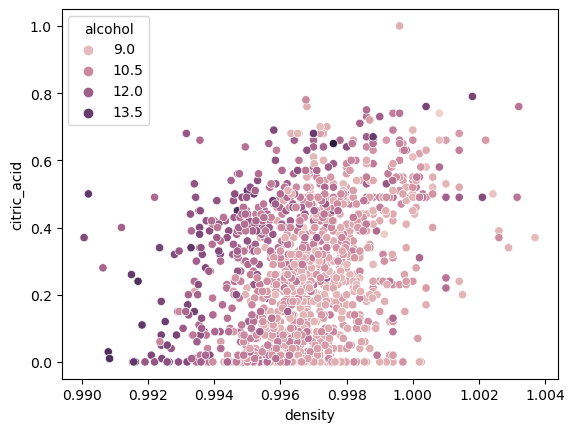

In [11]:
sns.scatterplot(x = "density", y = "citric_acid", hue = "alcohol", data = data)

In [12]:
predictors_col = ["density", "citric_acid", "total_sulfur_dioxide"]
target_col = ['alcohol']

In [13]:
predictors = data[predictors_col]
target = data[target_col]

In [14]:
predictors

,density,citric_acid,total_sulfur_dioxide
0,0.99780,0.00,34.0
1,0.99680,0.00,67.0
2,0.99700,0.04,54.0
3,0.99800,0.56,60.0
4,0.99780,0.00,34.0
...,...,...,...
1594,0.99490,0.08,44.0
1595,0.99512,0.10,51.0
1596,0.99574,0.13,40.0
1597,0.99547,0.12,44.0


In [15]:
target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [16]:
corr = predictors.corr()
corr

,density,citric_acid,total_sulfur_dioxide
density,1.000000,0.364947,0.071269
citric_acid,0.364947,1.000000,0.035533
total_sulfur_dioxide,0.071269,0.035533,1.000000


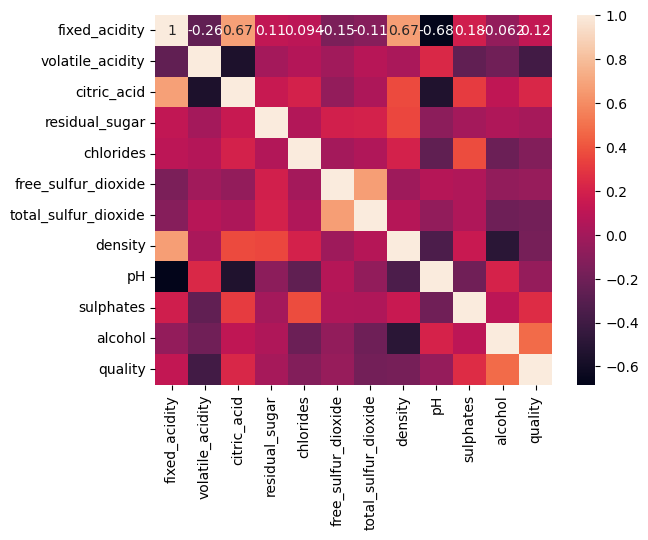

In [17]:
corr_matrix = data.corr()
ax = sns.heatmap(corr_matrix, annot=True)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [19]:
tree = DecisionTreeClassifier()

In [26]:
arbol = tree.fit(X_train, Y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [24]:
plot_tree(arbol)

NameError: name 'arbol' is not defined

In [23]:
clf = tree.DecisionTreeClassifier()
arbol = tree.fit(X_train, Y_train)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'DecisionTreeClassifier'

In [65]:
plot_tree(arbol)

NameError: name 'arbol' is not defined

In [72]:
predicciones = arbol.predict(X_test)

NameError: name 'arbol' is not defined

In [73]:
predicciones

NameError: name 'predicciones' is not defined

In [74]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

NameError: name 'predicciones' is not defined

In [75]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

NameError: name 'predicciones' is not defined